In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5,5,3,1,3
length_of_service,8,4,7,10,2


# EDA

In [3]:
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 13)
Shape of Test Dataset:  (23490, 12)


In [4]:
#EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Text(0.5, 0.98, 'Numerical Variables')

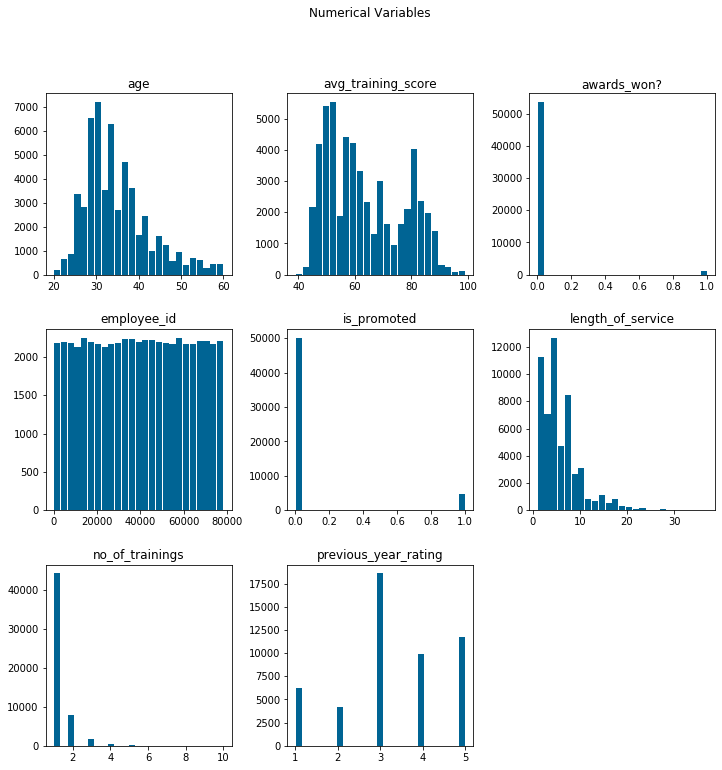

In [5]:
#numerical variables including target

ax = train.hist(bins=25, grid=False, figsize=(12,12),color='#006494',zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

In [ ]:
# categorical features - department
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=train, palette="viridis",hue="is_promoted", order = train['department'].value_counts().index)
ax.grid(False)
plt.suptitle("Department")
plt.show()

In [ ]:
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=train, 
                    palette="viridis", order = train['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region")
plt.show()

In [ ]:
# categorical features - education
plt.figure(figsize=(6,4))
ax = sns.countplot(x="education",data=train, palette="viridis",hue="is_promoted", order = train['education'].value_counts().index)
ax.grid(False)
plt.suptitle("Education")
plt.show()

In [ ]:
# categorical features - gender
plt.figure(figsize=(6,4))
ax = sns.countplot(x="gender",data=train, palette="viridis",hue="is_promoted", order=train['gender'].value_counts().index)
sns.set(style="whitegrid")
ax.grid(False)
plt.suptitle("Gender")
plt.show()

In [ ]:
# categorical features - recruitment_channel
plt.figure(figsize=(6,4))
ax = sns.countplot(x="recruitment_channel",data=train, palette="viridis",hue="is_promoted", order=train['recruitment_channel'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Recruitment Channel")
plt.show()

### Target

In [ ]:
train.is_promoted.value_counts(normalize=True)

In [ ]:
train.is_promoted.value_counts()

# Preprocessing

In [6]:
#merge train and test for preprocessing
df = train
df = df.append(test)
df.shape

(78298, 13)

## Missing Values

In [7]:
#checking missing values
print("Education NA: ",(df.education.isna().sum()/len(df))*100)
print("Previous Year Rating NA: ",(df.previous_year_rating.isna().sum()/len(df))*100)

Education NA:  4.397302613093566
Previous Year Rating NA:  7.581291987023935


In [8]:
df.education.value_counts(normalize=True)

Bachelor's          0.697976
Master's & above    0.286273
Below Secondary     0.015750
Name: education, dtype: float64

In [9]:
#treating na as a new category called missing
df['education'] = df['education'].fillna('Missing')
df.education.value_counts(normalize=True,dropna=False)

Bachelor's          0.667284
Master's & above    0.273685
Missing             0.043973
Below Secondary     0.015058
Name: education, dtype: float64

In [10]:
df.previous_year_rating.value_counts(normalize=True)

3.0    0.366753
5.0    0.232691
4.0    0.195213
1.0    0.123034
2.0    0.082308
Name: previous_year_rating, dtype: float64

In [11]:
df.previous_year_rating.median()

3.0

In [12]:
#replace missing value with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)
df.previous_year_rating.value_counts(normalize=True,dropna=False)

3.0    0.414762
5.0    0.215050
4.0    0.180413
1.0    0.113707
2.0    0.076068
Name: previous_year_rating, dtype: float64

## One Hot Encoder

In [13]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['department','region','education','gender','recruitment_channel']]).toarray()
ohe_labels = ohe.get_feature_names(['department','region','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [14]:
#drop columns and concat both dataframes
df.drop(columns= ['department','region','education','gender','recruitment_channel'], inplace=True)
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   no_of_trainings               78298 non-null  int64  
 2   age                           78298 non-null  int64  
 3   previous_year_rating          78298 non-null  float64
 4   length_of_service             78298 non-null  int64  
 5   awards_won?                   78298 non-null  int64  
 6   avg_training_score            78298 non-null  int64  
 7   is_promoted                   54808 non-null  float64
 8   department_Analytics          78298 non-null  float64
 9   department_Finance            78298 non-null  float64
 10  department_HR                 78298 non-null  float64
 11  department_Legal              78298 non-null  float64
 12  department_Operations         78298 non-null  float64
 13  d

### Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.000000,0.375,1.0,0.194444,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.0,0.083333,0.0,0.350000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.5,0.166667,0.0,0.183333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.0,0.250000,0.0,0.183333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.5,0.027778,0.0,0.566667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Random Seed

In [16]:
seed_value = 12321
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

### Validation Data

In [17]:
#separate train and test datasets
train, test = df[~df['is_promoted'].isnull()], df[df['is_promoted'].isnull()]
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 60)
Shape of Test Dataset:  (23490, 60)


In [18]:
train.drop(columns=['employee_id'],inplace=True)
print("Shape of Train Dataset: ",train.shape)

Shape of Train Dataset:  (54808, 59)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3,random_state=seed_value)
print("Shape of X Train Dataset: ",X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)
print("Shape of X Valid Dataset: ",X_valid.shape)
print("Shape of Y Valid Dataset: ",y_valid.shape)

Shape of X Train Dataset:  (38365, 58)
Shape of Y Train Dataset:  (38365,)
Shape of X Valid Dataset:  (16443, 58)
Shape of Y Valid Dataset:  (16443,)


### Feature Selection

In [20]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

avg_training_score              0.027484
previous_year_rating            0.012679
awards_won?                     0.009639
length_of_service               0.004402
education_Bachelor's            0.004049
age                             0.002979
gender_m                        0.002779
recruitment_channel_sourcing    0.002546
region_region_19                0.002184
region_region_13                0.002184
department_R&D                  0.001767
education_Master's & above      0.001431
recruitment_channel_other       0.001270
region_region_4                 0.001265
department_Technology           0.001216
region_region_2                 0.001158
region_region_29                0.000979
region_region_22                0.000975
region_region_17                0.000905
region_region_9                 0.000882
region_region_14                0.000879
region_region_16                0.000866
region_region_20                0.000796
region_region_10                0.000757
region_region_27

In [21]:
from sklearn.feature_selection import SelectKBest

select_top40 = SelectKBest(mutual_info_classif,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

Index(['no_of_trainings', 'age', 'previous_year_rating', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_HR',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_16', 'region_region_18',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_28', 'region_region_32',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'education_Missing', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [22]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select].head(5)

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_HR,department_R&D,department_Sales & Marketing,department_Technology,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
26344,0.111111,0.325,1.00,0.0,0.366667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21538,0.000000,0.300,1.00,0.0,0.383333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15489,0.000000,0.825,0.25,0.0,0.200000,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15565,0.000000,0.275,1.00,0.0,0.116667,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48575,0.000000,0.525,0.50,0.0,0.816667,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Classification Models

In [23]:
#import modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]
  

In [25]:
# calculating models scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

,name,score
4,AdaBoost,0.932859
2,Decision_Tree,0.930974
3,Random_Forest,0.923615
1,RBF_SVM,0.920574
0,Nearest_Neighbors,0.914979
5,Naive_Bayes,0.484340


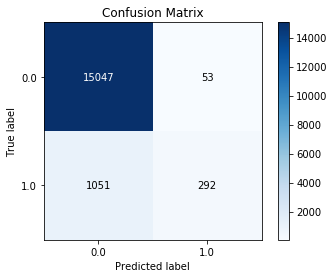

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score
import scikitplot as skplt

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix')
plt.show()

In [41]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9328589673417259
Recall:  0.21742367833209233
Precision:  0.8463768115942029
F1 Score:  0.3459715639810427


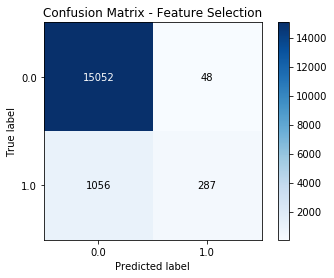

In [42]:
# model only the top_40 features
adc.fit(X_train[feat_select], y_train)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Feature Selection')
plt.show()

In [45]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9328589673417259
Recall:  0.2137006701414743
Precision:  0.8567164179104477
F1 Score:  0.3420738974970202


## Desbalanced Target

In [46]:
#oversampling class 1

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros= ros.fit_resample(X_train[feat_select],y_train)
y_ros.value_counts()

1.0    35040
0.0    35040
Name: is_promoted, dtype: int64

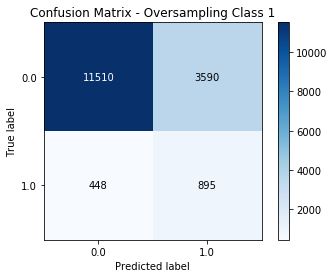

In [47]:
adc.fit(X_ros[feat_select], y_ros)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Oversampling Class 1')
plt.show()


In [48]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.7544243751140303
Recall:  0.6664184661206255
Precision:  0.1995540691192865
F1 Score:  0.3071379547014413


In [49]:
#undersampling - tomek_links

from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
X_t1,y_t1= t1.fit_resample(X_train[feat_select],y_train)
y_t1.value_counts()


0.0    33974
1.0     3325
Name: is_promoted, dtype: int64

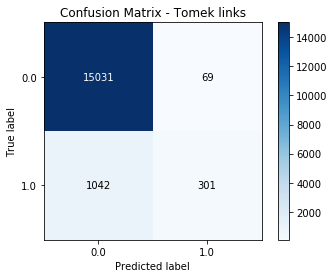

In [50]:
adc.fit(X_t1[feat_select], y_t1)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Tomek links')
plt.show()

In [51]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.9324332542723347
Recall:  0.22412509307520476
Precision:  0.8135135135135135
F1 Score:  0.3514302393461763


In [52]:
# neighbourhood cleaning rule

from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
X_ncr,y_ncr= ncr.fit_resample(X_train[feat_select],y_train)


In [55]:
y_ncr.value_counts()

0.0    28550
1.0     3325
Name: is_promoted, dtype: int64

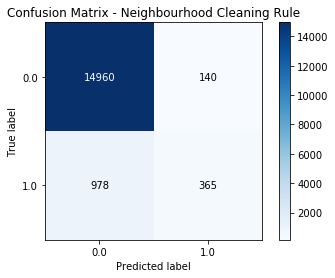

In [56]:
adc.fit(X_ncr[feat_select], y_ncr)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Neighbourhood Cleaning Rule')
plt.show()

In [54]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.9320075412029435
Recall:  0.2717795979151154
Precision:  0.7227722772277227
F1 Score:  0.395021645021645
